# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


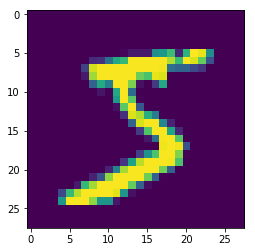

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
from keras.layers import Activation
model = Sequential()
'''
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 22,22 #RF 9X9
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 20,20 #RF 11X11
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 18,18 #RF 13X13
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 16,16 #RF 15X15
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 14,14 #RF 17X17
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 12,12 #RF 19X19

model.add(Convolution2D(10, 1, activation='relu')) #input 10,10
model.add(Convolution2D(10, 10)) #input 10,10

'''

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(MaxPooling2D(pool_size=(2, 2))) #input 22,22 #RF 14X14
model.add(Convolution2D(32, 3, 3, activation='relu')) #input 11,11 #RF 16X16
model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 9)) #input 9X9
'''

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(MaxPooling2D(pool_size=(2, 2))) #input 24,24 #RF 6X6
model.add(Convolution2D(32, 3, 3, activation='relu')) #input 12,12 #RF 8X8
#model.add(Convolution2D(32, 3, 3, activation='relu')) #input 11,11 #RF 10X10
model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 10)) #input 9X9
'''

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 9, 9, 32)          4640      
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 9, 9, 10)          330       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 1, 1, 10)          8110      
__________

In [0]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=1.0, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [65]:
history = model.fit(X_train, Y_train, batch_size=16, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 24s 396us/step - loss: 0.1434 - acc: 0.9573 - val_loss: 0.0573 - val_acc: 0.9822
Epoch 2/30
60000/60000 [==============================] - 22s 361us/step - loss: 0.0549 - acc: 0.9835 - val_loss: 0.0411 - val_acc: 0.9870
Epoch 3/30
60000/60000 [==============================] - 22s 361us/step - loss: 0.0413 - acc: 0.9871 - val_loss: 0.0357 - val_acc: 0.9884
Epoch 4/30
60000/60000 [==============================] - 23s 379us/step - loss: 0.0334 - acc: 0.9892 - val_loss: 0.0380 - val_acc: 0.9880
Epoch 5/30
60000/60000 [==============================] - 22s 361us/step - loss: 0.0277 - acc: 0.9913 - val_loss: 0.0373 - val_acc: 0.9884
Epoch 6/30
60000/60000 [==============================] - 22s 364us/step - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0360 - val_acc: 0.9887
Epoch 7/30
60000/60000 [==============================] - 22s 371us/step - loss: 0.0203 - acc: 0.9932 - val_loss: 0.

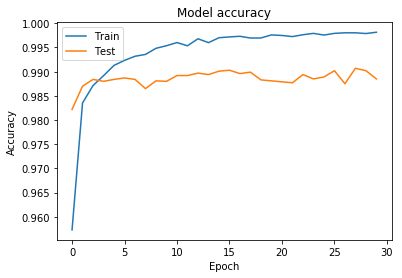

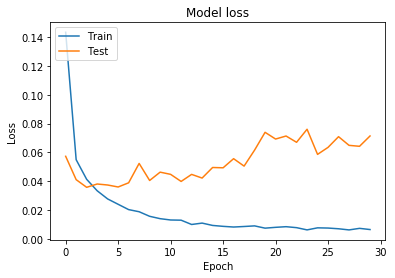

In [66]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [69]:
model.fit(X_train, Y_train, batch_size=8, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  160/60000 [..............................] - ETA: 55s - loss: 1.8166e-04 - acc: 1.0000 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 43s 714us/step - loss: 0.0125 - acc: 0.9967 - val_loss: 0.0730 - val_acc: 0.9869
Epoch 2/10
60000/60000 [==============================] - 46s 759us/step - loss: 0.0108 - acc: 0.9965 - val_loss: 0.0545 - val_acc: 0.9914
Epoch 3/10
60000/60000 [==============================] - 43s 714us/step - loss: 0.0114 - acc: 0.9966 - val_loss: 0.0685 - val_acc: 0.9887
Epoch 4/10
60000/60000 [==============================] - 44s 733us/step - loss: 0.0113 - acc: 0.9966 - val_loss: 0.0712 - val_acc: 0.9886
Epoch 5/10
60000/60000 [==============================] - 44s 734us/step - loss: 0.0130 - acc: 0.9965 - val_loss: 0.0708 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 44s 725us/step - loss: 0.0118 - acc: 0.9967 - val_loss: 0.0852 - val_acc: 0.9884
Epoch 7/10
60000/60000 [==============================] - 44s 733us/step - loss: 0.0103 - acc: 0.9971 - val_loss: 0.0741 - val_acc: 0.9872
Epoch 8/10
60000/60000 [==============

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [71]:
print(score)

[0.06376545303444647, 0.9904]


In [0]:
y_pred = model.predict(X_test)

In [126]:
print(y_pred[:9])
print(y_test[:9])

[[8.83453048e-17 2.23902832e-22 5.03254502e-13 1.60512364e-13
  4.02065522e-23 9.60435273e-19 0.00000000e+00 1.00000000e+00
  1.39047658e-16 1.85744840e-11]
 [3.93890887e-21 7.82338257e-12 1.00000000e+00 3.59788031e-17
  1.38093388e-18 1.37124121e-29 4.85452095e-11 2.52794327e-23
  1.14365700e-16 1.80574017e-27]
 [4.05707407e-17 1.00000000e+00 2.24106909e-12 8.25022068e-17
  6.03128159e-10 3.44477593e-14 1.42322758e-13 1.16682185e-11
  3.78736241e-13 1.01929050e-17]
 [1.00000000e+00 5.48987821e-33 1.91183327e-17 4.73503497e-22
  6.40486258e-19 6.92827582e-24 3.11879712e-15 4.00338433e-19
  3.24701504e-19 7.47422979e-19]
 [8.47725630e-29 1.00496457e-21 2.52994851e-24 3.29754186e-28
  1.00000000e+00 2.08647185e-28 4.26313701e-21 5.24219354e-19
  6.29316102e-20 1.76778762e-15]
 [2.48050972e-12 1.00000000e+00 9.11990483e-10 4.10908282e-16
  9.71266290e-10 5.04951478e-17 5.48377736e-14 4.93403363e-08
  8.02247435e-11 1.75318283e-13]
 [9.30098297e-33 9.37158608e-15 2.06010754e-17 7.46690805e

In [127]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_21': <keras.layers.core.Activation at 0x7f58f2cb80f0>,
 'conv2d_173': <keras.layers.convolutional.Conv2D at 0x7f58f2d7d748>,
 'conv2d_174': <keras.layers.convolutional.Conv2D at 0x7f58f2d7d550>,
 'conv2d_175': <keras.layers.convolutional.Conv2D at 0x7f58f2d27160>,
 'conv2d_176': <keras.layers.convolutional.Conv2D at 0x7f58f2d270f0>,
 'conv2d_177': <keras.layers.convolutional.Conv2D at 0x7f58f2cc8ba8>,
 'conv2d_178': <keras.layers.convolutional.Conv2D at 0x7f58f2cf15c0>,
 'flatten_21': <keras.layers.core.Flatten at 0x7f58f2c8bfd0>,
 'max_pooling2d_13': <keras.layers.pooling.MaxPooling2D at 0x7f58f2cdde10>}

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_156'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()